# Amazon Product Reviews Sentiment Analysis using NLP

**Authors:**
***


* Wambui Githinji
* Lynette Mwiti  
*   Felix Njoroge
*   Wilfred Lekishorumongi
*   Monica Mwangi
*   Joan Maina







```


##  Problem Statement
Reviews are critical to businesses as they offer insights into customer satisfaction, preferences and areas of improvement.

Businesses need to understand and interpret these reviews in order to cut through the competition. Lots of reviews are generated daily and manually analyzing them is impractical.


***
**Objectives**

Use Sentiment analysis to help the businesses get actionable insights from the feedback received from customers.

The approach taken with the analysis seeks to
*  Determine the sentiment of the reviews (positive or negative) to understand overall customer satisfaction and feedback.

*   Utilize sentiment analysis to help our stakeholders understand customer preferences across various products.

*   Conduct exploratory data analysis to understand the distribution of sentiments over time, across barands and products.

*   Leverage customer reviews to identify areas for improvement in products based on user experience.



*   Build a classifier model to help predict reviews as positive or negative





***

## Data Sources
Data for this project was obtained from Kaggle [repository]
(https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products?resource=download)

The data represents:

**Brand**: The brand name of the product being reviewed.

**Categories:** Categories or tags that classify the product (e.g., electronics, home, books).

**Keys**: Keywords or identifiers associated with the product.

**Manufacturer:** The company or entity that manufactures the product.

**Reviews.date**: The date when the review was posted.

**Reviews.dateAdded:** Additional date-related information, possibly indicating when the review was added to the dataset.

**Reviews.dateSeen:** Dates indicating when the review was observed or recorded (possibly by a data aggregator or platform).

**Reviews.didPurchase:** Boolean (true/false) indicating whether the reviewer claims to have purchased the product.

**Reviews.doRecommend:** Boolean (true/false) indicating whether the reviewer recommends the product.

**Reviews.id:** Unique identifier for each review.

**Reviews.numHelpful:** Number of users who found the review helpful.

**Reviews.rating:** Rating given by the reviewer (typically on a scale such as 1 to 5 stars).

**Reviews.sourceURLs:** URLs pointing to the source of the review.

**Reviews.text:** The main body of the review text.

**Reviews.title:** The title or headline of the review.

**Reviews.userCity:** City location of the reviewer.

**Reviews.userProvince:** Province or state location of the reviewer.

**Reviews.username:** Username or identifier of the reviewer.


These are the variables this analysis will focus on to derive insights.










# **Methodology**

The process can be divided into these many parts.(we will edit this bit to the exact number once done)

**Data preparation**

*   Text Cleaning: Remove or handle punctuation, special characters, numbers, and stopwords
*   Tokenization: Split text into words or subwords.
*   Text Normalization: Convert text to lowercase, perform stemming or lemmatization.
*   Padding/Truncation: Ensure all text sequences are of the same length.
*   Train-Test Split: Divide your data into training, validation, and test sets


**EDA**
Visualisations and insights.
For each characteristic we will be:
- Creating visualisations
- Drawing conclusions
- Providing recommendations

**Feature Engineering**

In the feature engineering section, we process and transform the textual data for further analysis and modeling:

The methods used are;
*   Sentiment Analysis
*   Visualization with Word Clouds
*   Text Vectorization to convert textual data into numerical form using TF-IDF and Count Vectorization.
*   Word Embedding using Word2Vec and FastTex

We will also Extract the Bigrams and Trigrams

**Model Selection and Building**

The models used are  a Simple RNN, LSTM, BERT models

**Hyperparameter Tuning:** Optimize hyperparameters for better performance.

**Model Evaluation**

Evaluate Performance using the accuracy score.

**Analyze Results:** Look at the confusion matrix, ROC curves, and other evaluation tools.



# **Data** **preparation**

**Importing Libraries**

In [ ]:
#Basic libraries
import pandas as pd
import numpy as np

#NLTK libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import re
import string
!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning libraries
import sklearn
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing

!pip install tensorflow
!pip install keras
!pip install numpy pandas scikit-learn

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

#Visualization libraries
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


LOADING DATA

In [ ]:
# Loading the data set

raw = pd.read_csv('AMAZON REVIEWS.csv')
raw

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23744,AVpfl8cLLJeJML43AE3S,"Echo (White),,,\r\nEcho (White),,,","B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2017-07-29T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5588528/review...,Great sound quality. Great way to control othe...,Easy to setup and use.,NaN,NaN,AmericanChick
23745,AVpfl8cLLJeJML43AE3S,"Echo (White),,,\r\nEcho (White),,,","B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2017-07-29T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5588528/review...,My daughter loves this and uses it for her eve...,It was a gift for my daughter,NaN,NaN,Lildave56
23746,AVpfl8cLLJeJML43AE3S,"Echo (White),,,\r\nEcho (White),,,","B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2017-07-29T00:00:00.000Z,NaN,"2017-09-28T00:00:00Z,2017-09-08T00:00:00Z,2017...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5588528/review...,Really enjoy the great speaker and music on de...,Fun item,NaN,NaN,Jeff
23747,AVpfl8cLLJeJML4

DATA INSPECTION AND UNDERSTANDING

In [ ]:
# Checking the data types and null values
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23749 entries, 0 to 23748
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    23749 non-null  object 
 1   name                  23749 non-null  object 
 2   asins                 23747 non-null  object 
 3   brand                 23749 non-null  object 
 4   categories            23749 non-null  object 
 5   keys                  23749 non-null  object 
 6   manufacturer          23749 non-null  object 
 7   reviews.date          23722 non-null  object 
 8   reviews.dateAdded     18982 non-null  object 
 9   reviews.dateSeen      23749 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   23258 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    23291 non-null  float64
 14  reviews.rating        23717 non-null  float64
 15  reviews.sourceURLs 

Columns with 0 Non-Null Count
* This column has 0 non-null entries, meaning all 34,660 entries are missing or null.
* This column does not contain any useful data.

Columns with 1 Non-Null Count
* This column has only 1 non-null entry, meaning out of 34,660 rows, only one entry has a value and the rest are null.
* This column contains almost no useful data.

In [ ]:
# Checking the data shape
raw.shape

(23749, 21)

In [ ]:
#Summary statistics
raw.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,23291.000000,23717.000000,0.0,0.0
mean,111372787.0,0.545533,4.545811,NaN,NaN
std,NaN,10.856479,0.759198,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,780.000000,5.000000,NaN,NaN


In [ ]:
# Previewing the columns
raw.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

In [ ]:
# Renaming the columns to standard naming convention
column_names = {
    'id': 'id',
    'name': 'product_name',
    'asins': 'asins',
    'brand': 'brand',
    'categories': 'product_categories',
    'keys': 'product_keys',
    'manufacturer': 'manufacturer_name',
    'reviews.date': 'review_date',
    'reviews.dateAdded': 'review_date_added',
    'reviews.dateSeen': 'review_date_seen',
    'reviews.didPurchase': 'review_did_purchase',
    'reviews.doRecommend': 'review_do_recommend',
    'reviews.id': 'review_id',
    'reviews.numHelpful': 'review_num_helpful',
    'reviews.rating': 'review_rating',
    'reviews.sourceURLs': 'review_source_urls',
    'reviews.text': 'review_text',
    'reviews.title': 'review_title',
    'reviews.userCity': 'review_user_city',
    'reviews.userProvince': 'review_user_province',
    'reviews.username': 'review_username'
}

# Rename columns in your DataFrame
raw.rename(columns=column_names, inplace=True)

# Example: Printing the new column names
print(raw.columns)


Index(['id', 'product_name', 'asins', 'brand', 'product_categories',
       'product_keys', 'manufacturer_name', 'review_date', 'review_date_added',
       'review_date_seen', 'review_did_purchase', 'review_do_recommend',
       'review_id', 'review_num_helpful', 'review_rating',
       'review_source_urls', 'review_text', 'review_title', 'review_user_city',
       'review_user_province', 'review_username'],
      dtype='object')


In [ ]:
# Convert 'review_date' to datetime to enable trend analysis
raw['review_date'] = pd.to_datetime(raw['review_date'], format= 'mixed', utc=True)

# Print the data types to verify
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23749 entries, 0 to 23748
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   id                    23749 non-null  object             
 1   product_name          23749 non-null  object             
 2   asins                 23747 non-null  object             
 3   brand                 23749 non-null  object             
 4   product_categories    23749 non-null  object             
 5   product_keys          23749 non-null  object             
 6   manufacturer_name     23749 non-null  object             
 7   review_date           23722 non-null  datetime64[ns, UTC]
 8   review_date_added     18982 non-null  object             
 9   review_date_seen      23749 non-null  object             
 10  review_did_purchase   1 non-null      object             
 11  review_do_recommend   23258 non-null  object             
 12  revi

In [ ]:
# Checking for proportion of missing values

raw.isnull().mean()

id                      0.000000
product_name            0.000000
asins                   0.000084
brand                   0.000000
product_categories      0.000000
product_keys            0.000000
manufacturer_name       0.000000
review_date             0.001137
review_date_added       0.200724
review_date_seen        0.000000
review_did_purchase     0.999958
review_do_recommend     0.020675
review_id               0.999958
review_num_helpful      0.019285
review_rating           0.001347
review_source_urls      0.000000
review_text             0.000042
review_title            0.000126
review_user_city        1.000000
review_user_province    1.000000
review_username         0.000253
dtype: float64

In [ ]:
# Checking the missing values
raw.isnull().sum()

id                          0
product_name                0
asins                       2
brand                       0
product_categories          0
product_keys                0
manufacturer_name           0
review_date                27
review_date_added        4767
review_date_seen            0
review_did_purchase     23748
review_do_recommend       491
review_id               23748
review_num_helpful        458
review_rating              32
review_source_urls          0
review_text                 1
review_title                3
review_user_city        23749
review_user_province    23749
review_username             6
dtype: int64

In [ ]:
#check percentage of missing values

# create a function to check the percentage of missing values
def missing_values(raw):
    miss = raw.isnull().sum().sort_values(ascending = False)
    percentage_miss = (raw.isnull().sum() / len(raw)).sort_values(ascending = False)
    missing = pd.DataFrame({"Missing Values": miss, "Percentage": percentage_miss}).reset_index()
    missing.drop(missing[missing["Percentage"] == 0].index, inplace = True)
    return missing

missing_data = missing_values(raw)
missing_data

,index,Missing Values,Percentage
0,review_user_province,23749,1.000000
1,review_user_city,23749,1.000000
2,review_did_purchase,23748,0.999958
3,review_id,23748,0.999958
4,review_date_added,4767,0.200724
5,review_do_recommend,491,0.020675
6,review_num_helpful,458,0.019285
7,review_rating,32,0.001347
8,review_date,27,0.001137
9,review_username,6,0.000253


In [ ]:
# Checking for uniques values in all columns

# Loop through each column and print unique values
for column_name in raw.columns:
    unique_values = raw[column_name].unique()
    num_unique_values = len(unique_values)
    print(f"Unique Values in '{column_name}' (Total: {num_unique_values}):")
    print(unique_values)
    print("\n" + "="*50 + "\n")

# change to dataframe

Unique Values in 'id' (Total: 30):
['AVqkIhwDv8e3D1O-lebb' 'AVqVGZO3nnc1JgDc3jGK' 'AVpe9CMS1cnluZ0-aoC5'
 'AVpfBEWcilAPnD_xTGb7' 'AVqkIiKWnnc1JgDc3khH' 'AVqkIj9snnc1JgDc3khU'
 'AVsRjfwAU2_QcyX9PHqe' 'AVqVGZNvQMlgsOJE6eUY' 'AVpfwS_CLJeJML43DH5w'
 'AVphgVaX1cnluZ0-DR74' 'AVqVGZN9QMlgsOJE6eUZ' 'AVpftoij1cnluZ0-p5n2'
 'AVqkIhxunnc1JgDc3kg_' 'AVpioXbb1cnluZ0-PImd' 'AVpff7_VilAPnD_xc1E_'
 'AVpjEN4jLJeJML43rpUe' 'AVpg3q4RLJeJML43TxA_' 'AVqVGWLKnnc1JgDc3jF1'
 'AV1YnRtnglJLPUi8IJmV' 'AVphPmHuilAPnD_x3E5h' 'AVzvXXxbvKc47QAVfRhy'
 'AVpe7AsMilAPnD_xQ78G' 'AVph0EeEilAPnD_x9myq' 'AVqkIdntQMlgsOJE6fuB'
 'AVzRlorb-jtxr-f3ygvQ' 'AVqVGWQDv8e3D1O-ldFr' 'AVzvXXwEvKc47QAVfRhx'
 'AVpgdkC8ilAPnD_xsvyi' 'AV1YnR7wglJLPUi8IJmi' 'AVpfl8cLLJeJML43AE3S']


Unique Values in 'product_name' (Total: 33):
['All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta'
 'Kindle Oasis E-reader with Leather Charging Cover - Merlot, 6 High-Resolution Display (300 ppi), Wi-Fi - Includes Special Of

DATA CLEANING

**Handling Missing values**



In [ ]:
#drop all columns with high percentage of missing values and columns not needed

raw.drop(columns = ['review_date_added', 'review_date_seen', 'review_did_purchase' , 'review_user_city', 'review_user_province','review_id' , 'product_name' , 'review_source_urls'], inplace = True)

In [ ]:
# drop rows with missing values
raw.dropna(inplace = True)

In [ ]:
# Verify that there are no more missing values
print(raw.isnull().sum().sum())  # Should print 0

# Get the shape of the cleaned data
print(raw.shape)

# Display the first few rows of the cleaned data
raw.head(2)

0
(23251, 13)


,id,asins,brand,product_categories,product_keys,manufacturer_name,review_date,review_do_recommend,review_num_helpful,review_rating,review_text,review_title,review_username
0,AVqkIhwDv8e3D1O-lebb,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13 00:00:00+00:00,True,0.0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,AVqkIhwDv8e3D1O-lebb,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13 00:00:00+00:00,True,0.0,5.0,great for beginner or experienced person. Boug...,very fast,truman


**Checking for duplicates**

In [ ]:
# Checking duplicated rows
num_duplicated = raw.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicated}")

Number of duplicated rows: 0


In [ ]:
# Checking for duplicates using the 'CustomerId' column
raw[raw.duplicated(subset=["asins"])]


,id,asins,brand,product_categories,product_keys,manufacturer_name,review_date,review_do_recommend,review_num_helpful,review_rating,review_text,review_title,review_username
1,AVqkIhwDv8e3D1O-lebb,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13 00:00:00+00:00,True,0.0,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,AVqkIhwDv8e3D1O-lebb,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13 00:00:00+00:00,True,0.0,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,AVqkIhwDv8e3D1O-lebb,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13 00:00:00+00:00,True,0.0,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,AVqkIhwDv8e3D1O-lebb,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12 00:00:00+00:00,True,0.0,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42
5,AVqkIhwDv8e3D1O-lebb,B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12 00:00:00+00:00,True,0.0,5.0,This amazon fire 8 inch tablet is the perfect ...,Just what we expected,tklit
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23744,AVpfl8cLLJeJML43AE3S,"B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2017-07-29 00:00:00+00:00,True,0.0,5.0,Great sound quality. Great way to control othe...,Easy to setup and use.,AmericanChick
23745,AVpfl8cLLJeJML43AE3S,"B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2017-07-29 00:00:00+00:00,True,0.0,5.0,My daughter loves this and uses it for her eve...,It was a gift for my daughter,Lildave56
23746,AVpfl8cLLJeJML43AE3S,"B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2017-07-29 00:00:00+00:00,True,0.0,5.0,Really enjoy the great speaker and music on de...,Fun item,Jeff
23747,AVpfl8cLLJeJML43AE3S,"B00L9EPT8O,B01E6AO69U",Amazon,"Stereos,Remote Controls,Amazon Echo,Audio Dock...","echowhite/263039693056,echowhite/152558276095,...",Amazon,2017-07-28 00:00:00+00:00,True,0.0,5.0,After plugging my Echo in and downloading the ...,Amazon Echo is amazing!!!,Johnny


* The 'id' column has duplicated rows, but we will not remove them as they reflect valid multiple reviews or transactions for the same product.

* We did not set 'asins' or 'id' as indices because multiple entries for the same product (same 'asins') with different or the same 'id' are common in e-commerce datasets, reflecting multiple reviews or transactions for the same product.

**Checking for placeholders**

In [ ]:
# Define a comprehensive list of potential placeholder values
common_placeholders = ["", "na", "n/a", "nan",  "none", "null", "-", "--", "?", "??", "unknown", "missing", "void", "empty","#","#####"]

# Loop through each column and check for potential placeholders
found_placeholder = False
for column in raw.columns:
    unique_values = raw[column].unique()
    for value in unique_values:
        if pd.isna(value) or (isinstance(value, str) and value.strip().lower() in common_placeholders):
            count = (raw[column] == value).sum()
            print(f"Column '{column}': Found {count} occurrences of potential placeholder '{value}'")
            found_placeholder = True

if not found_placeholder:
    print("No potential placeholders found in the DataFrame.")

Column 'review_title': Found 1 occurrences of potential placeholder 'Na'
Column 'review_username': Found 1 occurrences of potential placeholder 'none'
Column 'review_username': Found 1 occurrences of potential placeholder 'Unknown'


In [ ]:
# Checking our column names
raw.columns

Index(['id', 'asins', 'brand', 'product_categories', 'product_keys',
       'manufacturer_name', 'review_date', 'review_do_recommend',
       'review_num_helpful', 'review_rating', 'review_text', 'review_title',
       'review_username'],
      dtype='object')

In [ ]:
#Checking the null values and data types after changes made
raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23251 entries, 0 to 23748
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   id                   23251 non-null  object             
 1   asins                23251 non-null  object             
 2   brand                23251 non-null  object             
 3   product_categories   23251 non-null  object             
 4   product_keys         23251 non-null  object             
 5   manufacturer_name    23251 non-null  object             
 6   review_date          23251 non-null  datetime64[ns, UTC]
 7   review_do_recommend  23251 non-null  object             
 8   review_num_helpful   23251 non-null  float64            
 9   review_rating        23251 non-null  float64            
 10  review_text          23251 non-null  object             
 11  review_title         23251 non-null  object             
 12  review_username      23

After cleaning the data set, we now have 34,054 rows and no missing values.

The data set is ready for EDA.

# **EXPLORATORY DATA ANALYSIS**

UNIVARIATE ANALYSIS

### 1. Distribution of ratings Word frequency, Word cloud and Sentiment Distribution

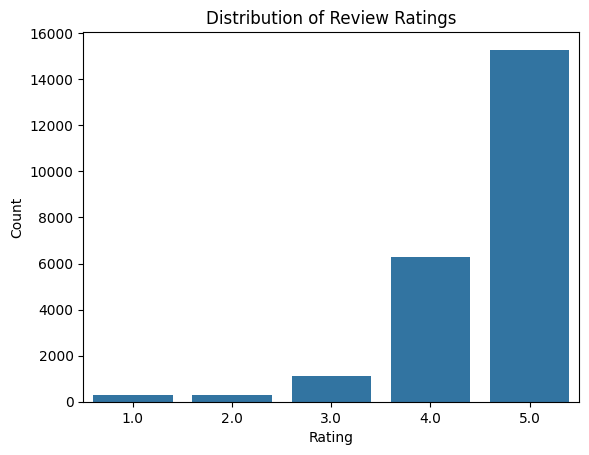

In [ ]:
# Distribution of ratings
import matplotlib.pyplot as plt
# Sentiment distribution (simple visualization based on ratings)
sns.countplot(x='review_rating', data=raw)
plt.title('Distribution of Review Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

* The distribution of review ratings shows that most reviews tend to be positive, with higher counts towards ratings 4 and 5.


### 2.Temporal Analysis

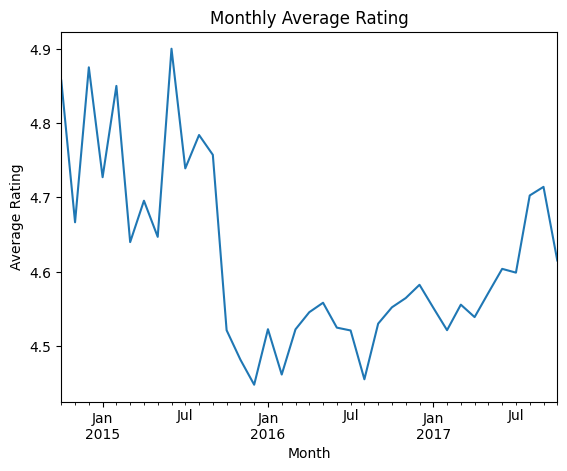

In [ ]:
# Temporal Analysis of rating over time

raw['review_date'] = pd.to_datetime(raw['review_date'])
raw.set_index('review_date', inplace=True)
raw['review_rating'].resample('M').mean().plot()
plt.title('Monthly Average Rating')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.show()

* There is a slight fluctuation in average ratings over time, but no clear trend is evident from the monthly average ratings plot.


### 3. Reviews by product category

In [ ]:
# Count occurrences of each category
category_counts = raw['product_categories'].value_counts().head(20)

# Extract top 20 categories and their counts
top_categories = category_counts.index

print("Top 20 Product Categories:")
print(category_counts)


# Assuming categories are separated by commas and need to be split
# Convert the 'product_categories' column to string type
raw['product_categories'] = raw['product_categories'].astype(str)

# Split the categories by commas
raw['product_categories'] = raw['product_categories'].str.split(',')

# Explode the list of categories
exploded_raw = raw.explode('product_categories')

# Group by 'product_categories' and calculate the mean review rating
mean_ratings = exploded_raw.groupby('product_categories')['review_rating'].mean().sort_values(ascending=False)

mean_ratings


Top 20 Product Categories:
product_categories
Fire Tablets,Tablets,Computers & Tablets,All Tablets,Electronics, Tech Toys, Movies, Music,Electronics,iPad & Tablets,Android Tablets,Frys                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               10965
Walmart for Business,Office Electronics,Tablets,Office,Electronics,iPad & Tablets,Windows Tablets,All Windows Tablets,Computers & Tablets,E-Readers & Accessories,E-Readers,eBook Readers,Kindle E-readers,Computers/Tablet

product_categories
Kids' Tablets           4.833333
Computer Accessories    4.833333
Cases & Bags            4.833333
Top Rated               4.833333
Tablets & eReaders      4.772283
                          ...   
Frys                    4.454396
 Tech Toys              4.454380
 Music                  4.454380
 Movies                 4.454380
Android Tablets         4.454172
Name: review_rating, Length: 79, dtype: float64

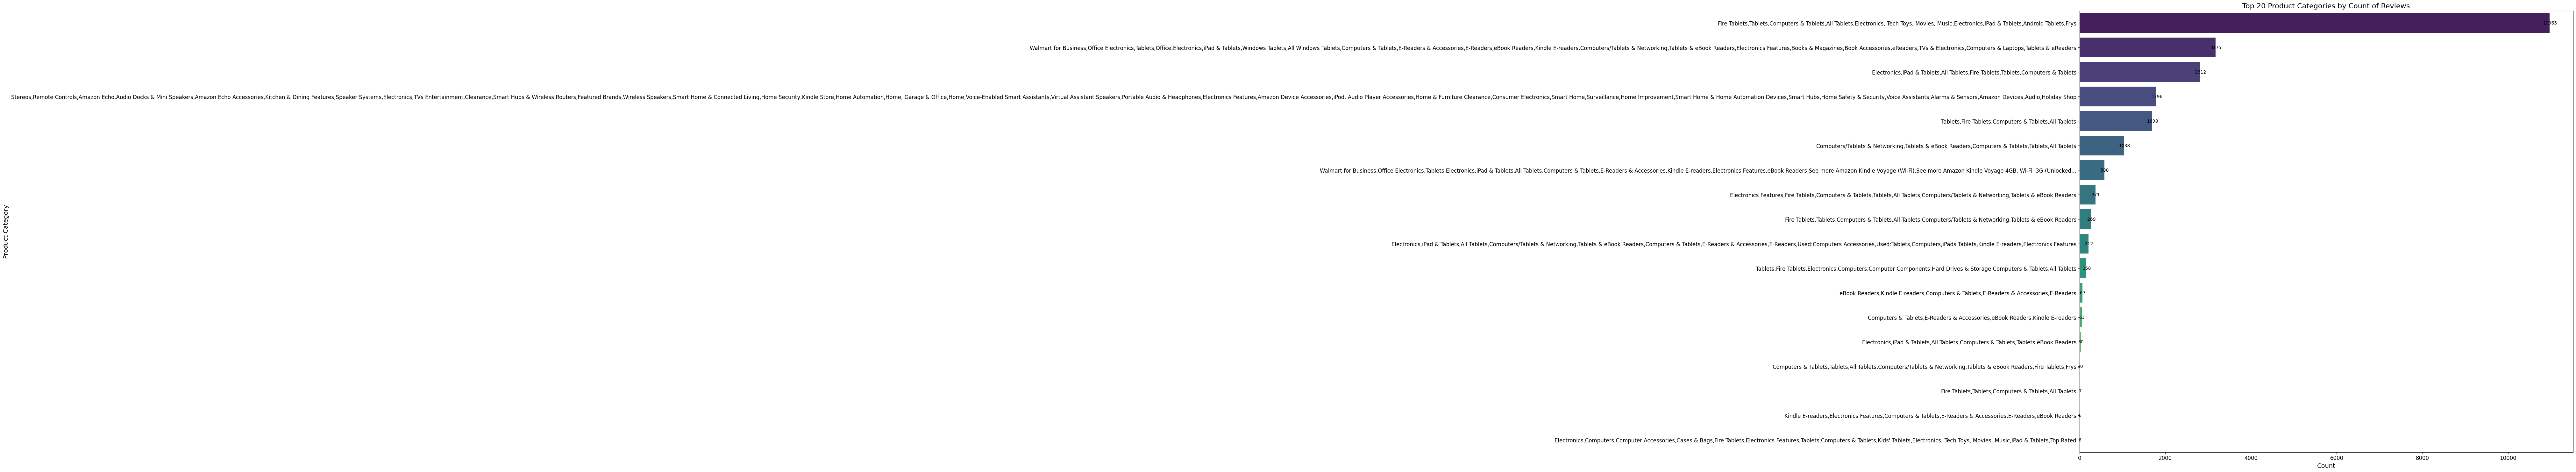

In [ ]:

plt.figure(figsize=(20, 18))

# Create a bar plot with a color gradient
bars = sns.barplot(y=top_categories, x=category_counts.values, palette="viridis")

# Add value labels to the bars
for bar, count in zip(bars.patches, category_counts.values):
    plt.text(count + 10,  # x-coordinate position
             bar.get_y() + bar.get_height() / 2,  # y-coordinate position
             f'{count}',  # formatted label text
             ha='center', va='center',  # horizontal and vertical alignment
             fontsize=10, color='black')  # text properties

plt.title('Top 20 Product Categories by Count of Reviews', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Product Category', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

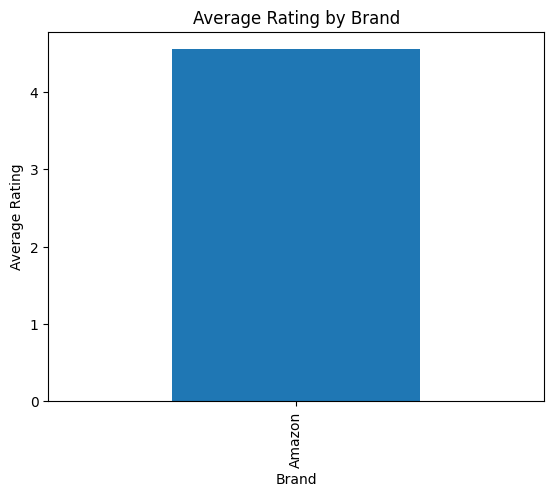

In [ ]:

# Plot review rating by brand
raw.groupby('brand')['review_rating'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Rating by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.show()

In [ ]:
# Assuming categories are separated by commas and need to be split
# Convert the 'product_categories' column to string type
raw['product_categories'] = raw['product_categories'].astype(str)

# Split the categories by commas
raw['product_categories'] = raw['product_categories'].str.split(',')

# Explode the list of categories
exploded_raw = raw.explode('product_categories')

# Group by 'product_categories' and calculate the mean review rating
mean_ratings = exploded_raw.groupby('product_categories')['review_rating'].mean().sort_values(ascending=False)

mean_ratings

product_categories
 'Kindle E-readers']       4.862745
['Computers & Tablets'     4.836066
 "Kids' Tablets"           4.833333
 'Cases & Bags'            4.833333
 'Computer Accessories'    4.833333
                             ...   
 ' Movies'                 4.454380
 ' Tech Toys'              4.454380
 ' Music'                  4.454380
 'Android Tablets'         4.454172
['Electronics Features'    4.425876
Name: review_rating, Length: 94, dtype: float64

### Conclusions
* Fire Tablets, Tablets, Computers & Tablets: Dominates with 10,965 reviews, indicating a strong presence in consumer feedback.

* Stereos, Remote Controls, Amazon Echo: Follows with 6,606 reviews, highlighting significant interest in home electronics and smart devices.

* Back To College, College Electronics: Shows strong engagement in electronics geared towards college students, with 5,051 reviews.



### 4. Most helpful Votes

In [ ]:
# Most helpful reviews
raw.sort_values(by='review_num_helpful', ascending=False).head(10)

,id,asins,brand,product_categories,product_keys,manufacturer_name,review_do_recommend,review_num_helpful,review_rating,review_text,review_title,review_username
review_date,,,,,,,,,,,,
2015-10-13 00:00:00+00:00,AVphgVaX1cnluZ0-DR74,B018Y229OU,Amazon,"[['Fire Tablets', 'Tablets', 'Computers & Ta...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,True,109.0,4.0,"I was looking for a good, cheap tablet for gen...",Great buy,Customer14228
2016-10-05 00:00:00+00:00,AVqkIiKWnnc1JgDc3khH,B01AHB9CYG,Amazon,"[['Tablets', 'Fire Tablets', 'Electronics', ...","841667104690,allnewfirehd8tablet8hddisplaywifi...",Amazon,True,105.0,4.0,"I've had lots of tablets in the past, mostly f...",Great price on an awesome little tablet,Jenn
2015-07-08 00:00:00+00:00,AV1YnRtnglJLPUi8IJmV,B00OQVZDJM,Amazon,"[['Walmart for Business', 'Office Electronics...","amazon/b00oqvzdjm,848719056099,amazonkindlepap...",Amazon,True,103.0,5.0,This review comes with a caveat. Many tech sit...,Excellent e-reader,codeblue
2015-10-26 00:00:00+00:00,AVphgVaX1cnluZ0-DR74,B018Y229OU,Amazon,"[['Fire Tablets', 'Tablets', 'Computers & Ta...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,True,102.0,5.0,This 7 inch tablet exceeded my expectations an...,Amazing value!,Corndog
2015-11-15 00:00:00+00:00,AVphgVaX1cnluZ0-DR74,B018Y229OU,Amazon,"[['Fire Tablets', 'Tablets', 'Computers & Ta...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,False,96.0,3.0,My view comes from being only a IPad user. And...,Amazon Free Time Ad machine,Scott
2015-10-16 00:00:00+00:00,AVphgVaX1cnluZ0-DR74,B018Y229OU,Amazon,"[['Fire Tablets', 'Tablets', 'Computers & Ta...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,True,73.0,5.0,Bought this at Best Buy since I had a $10 rewa...,You get a lot for $50,John
2014-11-16 00:00:00+00:00,AVphPmHuilAPnD_x3E5h,B00IOY8XWQ,Amazon,"[['Walmart for Business', 'Office Electronics...","848719040104,kindlevoyageereader6highresolutio...",Amazon,True,64.0,4.0,I am a big fan of e-readers. I prefer the e-in...,Excellent e-reader,Cooper25
2016-10-20 00:00:00+00:00,AVqkIhwDv8e3D1O-lebb,B01AHB9CN2,Amazon,"[['Electronics', 'iPad & Tablets', 'All Tabl...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,True,62.0,4.0,I am a power user; there's no other way of put...,Great For Basic To Moderate Use,ChucklesTheCheat
2015-10-01 00:00:00+00:00,AVphgVaX1cnluZ0-DR74,B018Y229OU,Amazon,"[['Fire Tablets', 'Tablets', 'Computers & Ta...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,True,57.0,5.0,a solid well made tablet that feels good in th...,great value for amazon prime members,gravyboy


BIVARIATE ANALYSIS

### 1. Helpful votes vs rating

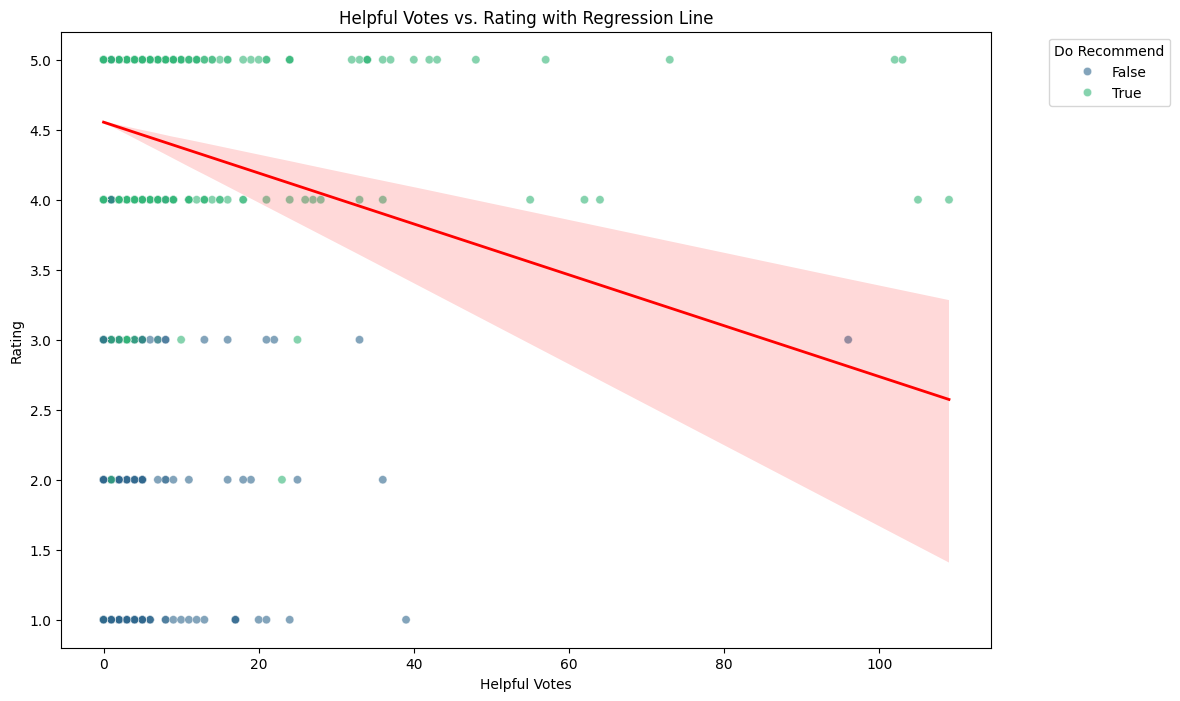

In [ ]:
plt.figure(figsize=(12, 8))

# Scatter plot with color coding, size encoding, and transparency
scatter = sns.scatterplot(
    x='review_num_helpful',
    y='review_rating',
    hue='review_do_recommend',
    sizes=(20, 200),  # Minimum and maximum size of points
    alpha=0.6,
    palette='viridis',  # Using a different color palette
    data=raw
)

# Add a regression line
sns.regplot(
    x='review_num_helpful',
    y='review_rating',
    scatter=False,
    color='red',
    line_kws={"linewidth": 2},
    data=raw
)

plt.title('Helpful Votes vs. Rating with Regression Line')
plt.xlabel('Helpful Votes')
plt.ylabel('Rating')
plt.legend(title='Do Recommend', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

* The scatter plot and regression analysis of helpful votes versus rating illustrate a positive correlation, indicating that more helpful reviews tend to have higher ratings.
* This suggests that customers find high-rated reviews more useful


### 2. Rating vs. Review recommendation

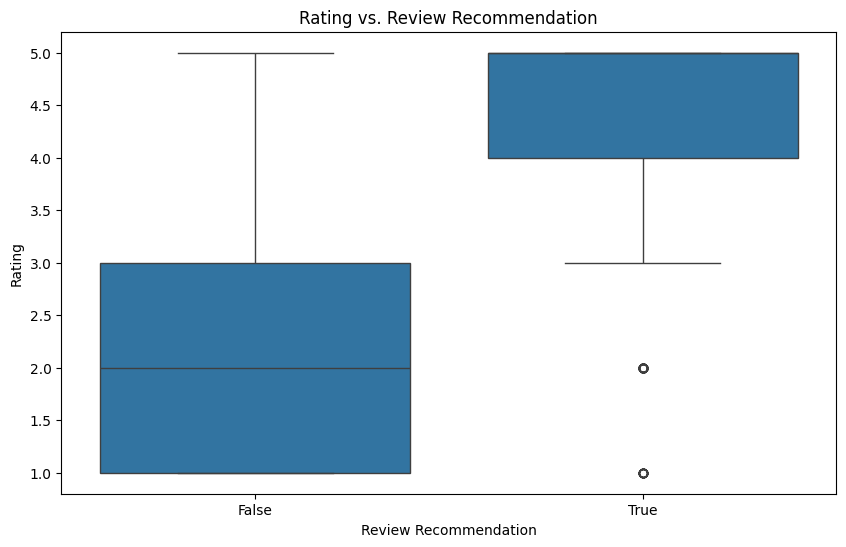

In [ ]:
# Convert review_do_recommend to a categorical type
raw['review_do_recommend'] = raw['review_do_recommend'].astype('category')

# Box plot of rating vs. review recommendation
plt.figure(figsize=(10, 6))
sns.boxplot(x='review_do_recommend', y='review_rating', data=raw)
plt.title('Rating vs. Review Recommendation')
plt.xlabel('Review Recommendation')
plt.ylabel('Rating')
plt.show()


* The analysis shows that reviews with a positive recommendation (review_do_recommend = True) generally have higher ratings compared to those without a recommendation.
* This highlights the influence of product satisfaction on recommendation.


### 3. Rating vs Length

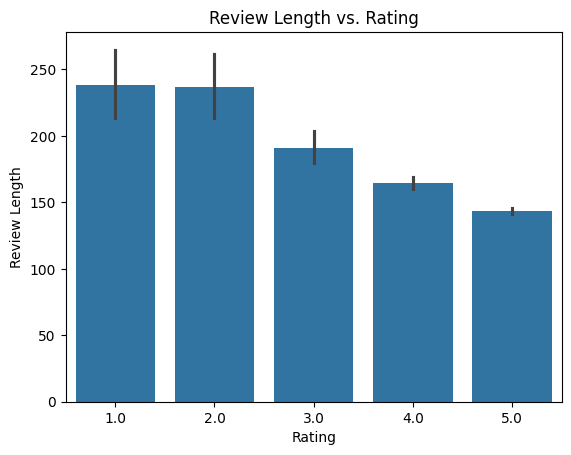

In [ ]:
raw['review_length'] = raw['review_text'].apply(len)

sns.barplot(x='review_rating', y='review_length', data=raw)
plt.title('Review Length vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.show()

* This visualization illustrates the relationship between review length and review rating. It is evident that shorter reviews tend to receive higher ratings.

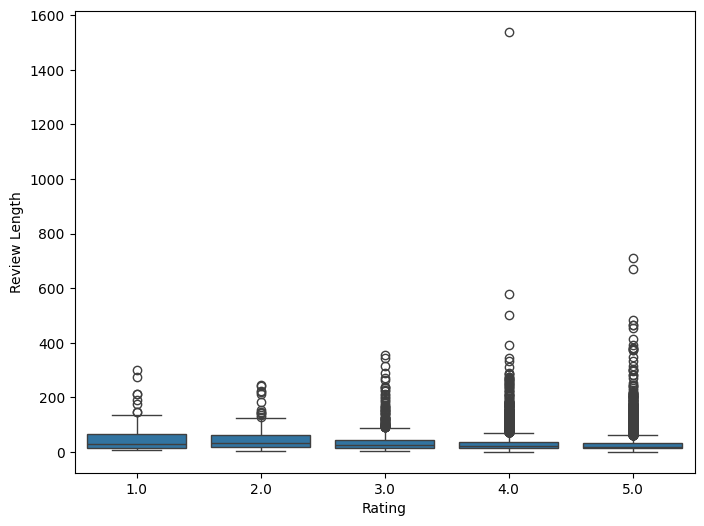

In [ ]:
word_count=[]
for s1 in raw.review_text:
    word_count.append(len(str(s1).split()))
plt.figure(figsize = (8,6))

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="review_rating",y=word_count,data=raw)
plt.xlabel('Rating')
plt.ylabel('Review Length')

plt.show()


* Due to the presence of outliers shown in the box plot, our visualization is currently obscured. To improve clarity, we will proceed by removing these outliers from the dataset.

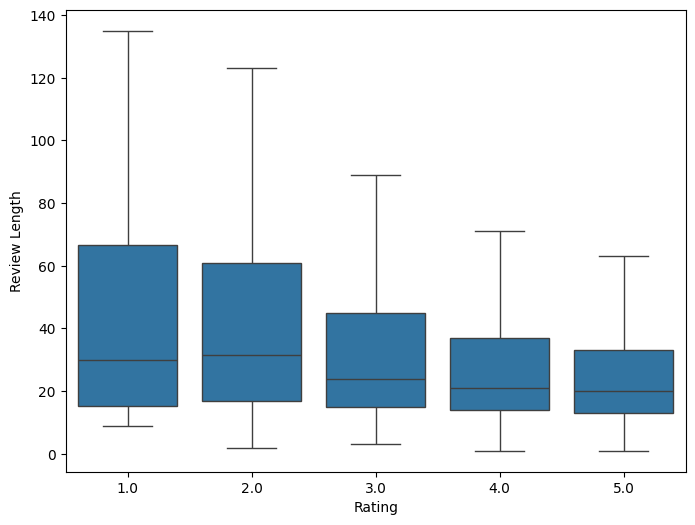

In [ ]:
# Generate box plots excluding outliers

plt.figure(figsize = (8,6))
sns.boxplot(x="review_rating",y=word_count,data=raw,showfliers=False)
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.show()


* We can now see that shorter reviews tend to receive higher ratings much better.

### Conclusions
The bar plot and box plot analyses show the relationship between review ratings and the length of reviews:

**Bar Plot Analysis**:
Indicates that longer reviews are generally associated with lowerr ratings.
This suggests that while longer reviews can provide richer insights, their association with lower ratings indicates that customers who invest more time in detailing their experiences often do so when they feel particularly disappointed or dissatisfied.

**Box Plot Analysis**:
Initially showed outliers affecting clarity in visualization.
After excluding outliers, the relationship between review length and rating became clearer

Lower ratings tend to have a wider range of review lengths, suggesting variability in experiences or dissatisfaction reasons.

Higher ratings are associated with a more concentrated range of review lengths, possibly indicating clearer satisfaction or positive experiences with the product.

These insights provide a deeper understanding of how review characteristics such as recommendation status and review length correlate with customer ratings, contributing valuable insights for product evaluation and improvement strategies.


### 3. Multivariate Analysis

### 1. Scatter plot of reviews

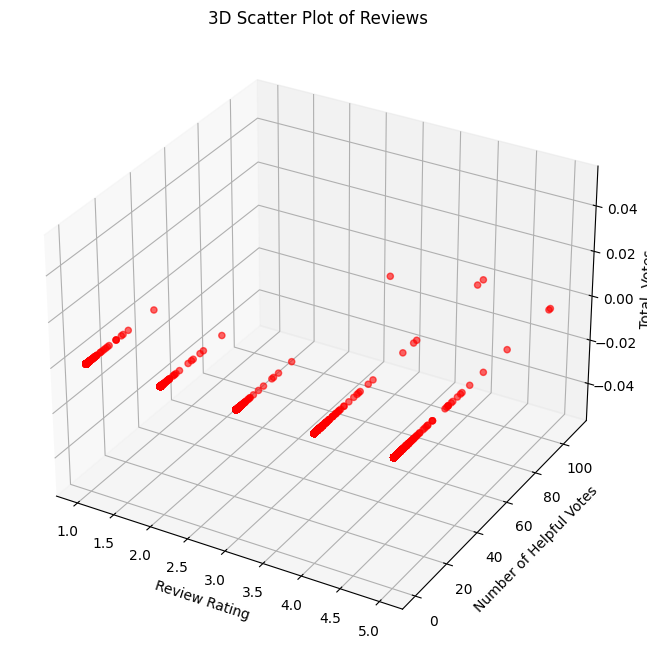

In [ ]:
# Ensure the column names are correct
review_rating_col = 'review_rating'
review_num_helpful_col = 'review_num_helpful'
total_votes_col = 'total_votes'
review_did_purchase_col = 'review_did_purchase'

# Check if 'review_did_purchase' exists, if not create it with a default value
if review_did_purchase_col not in raw.columns:
    raw[review_did_purchase_col] = False

# Ensure 'total_votes' column exists, if not create it with a default value
if total_votes_col not in raw.columns:
    raw[total_votes_col] = 0

# Plotting

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Map verified purchase to colors
colors = raw[review_did_purchase_col].map({True: 'blue', False: 'red'})

sc = ax.scatter(raw[review_rating_col], raw[review_num_helpful_col], raw[total_votes_col], c=colors, alpha=0.6)

# Adding labels and title
ax.set_xlabel('Review Rating')
ax.set_ylabel('Number of Helpful Votes')
ax.set_zlabel('Total  Votes')
plt.title('3D Scatter Plot of Reviews')

plt.show()

### Conclusions
* Visualizing reviews based on rating, helpful votes, and total votes shows various patterns, but it doesn't clearly reveal distinct groups based on whether the purchase was verified.


### 2. Pair Plot of Features

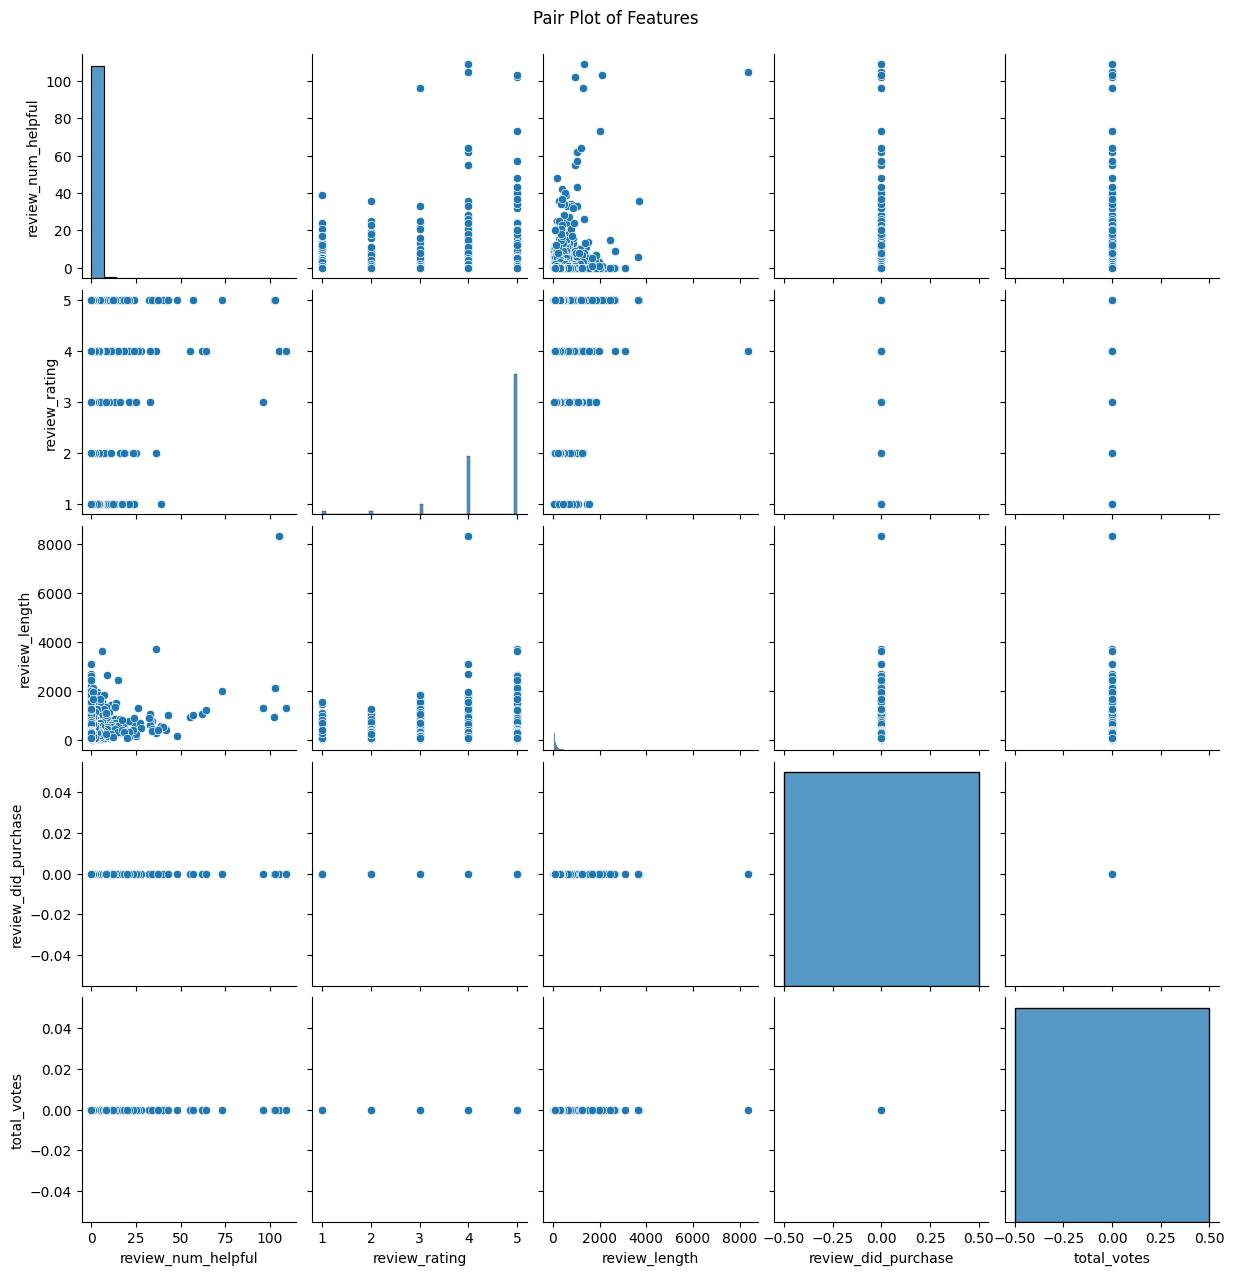

In [ ]:
sns.pairplot(raw)
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

### Conclusions
**Pair Plot:** The pair plot visually explored relationships between different numerical features in the dataset. It provides a quick overview of potential correlations and distributions among variables, aiding in identifying patterns or trends that might warrant further investigation.


# **Data pre-processing**

In [ ]:
# Check the column names
print(raw.columns)


Index(['id', 'asins', 'brand', 'product_categories', 'product_keys',
       'manufacturer_name', 'review_do_recommend', 'review_num_helpful',
       'review_rating', 'review_text', 'review_title', 'review_username',
       'review_length', 'review_did_purchase', 'total_votes'],
      dtype='object')


* Let's preview the first sentence in our text

In [ ]:
# Previewing the first sentence in our text

first_document = raw.iloc[2]['review_text']
first_document

'Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...'

In [ ]:
# Changing the name of our dataframe

data = pd.DataFrame(raw)


* For NLP preprocessing, we'll eliminate stopwords, punctuation, and numbers, and convert text to lowercase.
* Subsequently, tokenizing our data is essential because it breaks down text into individual words or tokens, enabling deeper analysis and understanding of the textual content.

In [ ]:

# Download NLTK stopwords and punctuation
nltk.download('stopwords')
nltk.download('punkt')

# Load stopwords and punctuation
stop_words = set(stopwords.words('english'))

# Function to clean and preprocess text
def clean_text(text):
    # Ensure text is a string and lowercase
    text = str(text).lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization using regex pattern
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    tokens = nltk.regexp_tokenize(text, pattern)

    # Remove stopwords
    clean_tokens = [token for token in tokens if token not in stop_words]

    return ' '.join(clean_tokens)


data['clean_text'] = raw['review_text'].apply(clean_text)
data['clean_title'] = raw['review_title'].apply(clean_text)

# Display the cleaned text along with original columns
data[['review_text', 'review_title', 'clean_text', 'clean_title']]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,review_text,review_title,clean_text,clean_title
review_date,,,,
2017-01-13 00:00:00+00:00,This product so far has not disappointed. My c...,Kindle,product far disappointed children love use lik...,kindle
2017-01-13 00:00:00+00:00,great for beginner or experienced person. Boug...,very fast,great beginner experienced person bought gift ...,fast
2017-01-13 00:00:00+00:00,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,inexpensive tablet use learn step nabi thrille...,beginner tablet year old son
2017-01-13 00:00:00+00:00,I've had my Fire HD 8 two weeks now and I love...,Good!!!,ive fire hd two weeks love tablet great valuew...,good
2017-01-12 00:00:00+00:00,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,bought grand daughter comes visit set user ent...,fantastic tablet kids
...,...,...,...,...
2017-07-29 00:00:00+00:00,Great sound quality. Great way to control othe...,Easy to setup and use.,great sound quality great way control smart de...,easy setup use
2017-07-29 00:00:00+00:00,My daughter loves this and uses it for her eve...,It was a gift for my daughter,daughter loves uses every day reminders questions,gift daughter
2017-07-29 00:00:00+00:00,Really enjoy the great speaker and music on de...,Fun item,really enjoy great speaker music demand asking...,fun item


In [ ]:
# Dropping the original columns as we now have the clean ones
data.drop(columns = ['review_text', 'review_title'] , inplace = True)
data.head(2)

,id,asins,brand,product_categories,product_keys,manufacturer_name,review_do_recommend,review_num_helpful,review_rating,review_username,review_length,review_did_purchase,total_votes,clean_text,clean_title
review_date,,,,,,,,,,,,,,,
2017-01-13 00:00:00+00:00,AVqkIhwDv8e3D1O-lebb,B01AHB9CN2,Amazon,"[['Electronics', 'iPad & Tablets', 'All Tabl...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,True,0.0,5.0,Adapter,143,False,0,product far disappointed children love use lik...,kindle
2017-01-13 00:00:00+00:00,AVqkIhwDv8e3D1O-lebb,B01AHB9CN2,Amazon,"[['Electronics', 'iPad & Tablets', 'All Tabl...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,True,0.0,5.0,truman,75,False,0,great beginner experienced person bought gift ...,fast


In [ ]:
# Rename the columns with the original column names
data.rename(columns={'clean_text': 'review_text', 'clean_title': 'review_title'}, inplace=True)

# Display the new DataFrame
data.head(1)


,id,asins,brand,product_categories,product_keys,manufacturer_name,review_do_recommend,review_num_helpful,review_rating,review_username,review_length,review_did_purchase,total_votes,review_text,review_title
review_date,,,,,,,,,,,,,,,
2017-01-13 00:00:00+00:00,AVqkIhwDv8e3D1O-lebb,B01AHB9CN2,Amazon,"[['Electronics', 'iPad & Tablets', 'All Tabl...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,True,0.0,5.0,Adapter,143,False,0,product far disappointed children love use lik...,kindle


In [ ]:
# Download NLTK WordNet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

* We will now perform lemmatization, which reduces words to their base form while still preserving their meaning to ensure consistency and improve the accuracy of our analysis.

In [ ]:
# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization on text
def lemmatize_text(text):
    words = text.split()

    # Lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(lemmatized_words)

# Apply lemmatization to review_text and review_title separately
data['lemmatized_text'] = data['review_text'].apply(lemmatize_text)
data['lemmatized_title'] = data['review_title'].apply(lemmatize_text)


In [ ]:
# Display the lemmatized text along with original columns
data[[ 'review_text' , 'review_title' , 'lemmatized_text', 'lemmatized_title']]

,review_text,review_title,lemmatized_text,lemmatized_title
review_date,,,,
2017-01-13 00:00:00+00:00,product far disappointed children love use lik...,kindle,product far disappointed child love use like a...,kindle
2017-01-13 00:00:00+00:00,great beginner experienced person bought gift ...,fast,great beginner experienced person bought gift ...,fast
2017-01-13 00:00:00+00:00,inexpensive tablet use learn step nabi thrille...,beginner tablet year old son,inexpensive tablet use learn step nabi thrille...,beginner tablet year old son
2017-01-13 00:00:00+00:00,ive fire hd two weeks love tablet great valuew...,good,ive fire hd two week love tablet great valuewe...,good
2017-01-12 00:00:00+00:00,bought grand daughter comes visit set user ent...,fantastic tablet kids,bought grand daughter come visit set user ente...,fantastic tablet kid
...,...,...,...,...
2017-07-29 00:00:00+00:00,great sound quality great way control smart de...,easy setup use,great sound quality great way control smart de...,easy setup use
2017-07-29 00:00:00+00:00,daughter loves uses every day reminders questions,gift daughter,daughter love us every day reminder question,gift daughter
2017-07-29 00:00:00+00:00,really enjoy great speaker music demand asking...,fun item,really enjoy great speaker music demand asking...,fun item


In [ ]:
# dropping the columns mot lemmatized

data.drop(columns = ['review_text', 'review_title'] , inplace = True)
data.head(1)

,id,asins,brand,product_categories,product_keys,manufacturer_name,review_do_recommend,review_num_helpful,review_rating,review_username,review_length,review_did_purchase,total_votes,lemmatized_text,lemmatized_title
review_date,,,,,,,,,,,,,,,
2017-01-13 00:00:00+00:00,AVqkIhwDv8e3D1O-lebb,B01AHB9CN2,Amazon,"[['Electronics', 'iPad & Tablets', 'All Tabl...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,True,0.0,5.0,Adapter,143,False,0,product far disappointed child love use like a...,kindle


In [ ]:
# Renaming the lemmatized columns
data.rename(columns={'lemmatized_text': 'review_text', 'lemmatized_title': 'review_title'}, inplace=True)

# Display the new DataFrame
data.head(1)

,id,asins,brand,product_categories,product_keys,manufacturer_name,review_do_recommend,review_num_helpful,review_rating,review_username,review_length,review_did_purchase,total_votes,review_text,review_title
review_date,,,,,,,,,,,,,,,
2017-01-13 00:00:00+00:00,AVqkIhwDv8e3D1O-lebb,B01AHB9CN2,Amazon,"[['Electronics', 'iPad & Tablets', 'All Tabl...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,True,0.0,5.0,Adapter,143,False,0,product far disappointed child love use like a...,kindle


In [ ]:
# Removing white spaces

# Function to remove extra spaces from text
def remove_extra_spaces(text):
    return ' '.join(text.strip().split())

# Apply function to the 'lemmatized_review_text' column
data['clean_text'] = data['review_text'].apply(remove_extra_spaces)

# Apply function to the 'lemmatized_review_title' column
data['clean_title'] = data['review_title'].apply(remove_extra_spaces)

# Display cleaned text along with original columns
data[['review_text', 'review_title','clean_text', 'clean_title']]


,review_text,review_title,clean_text,clean_title
review_date,,,,
2017-01-13 00:00:00+00:00,product far disappointed child love use like a...,kindle,product far disappointed child love use like a...,kindle
2017-01-13 00:00:00+00:00,great beginner experienced person bought gift ...,fast,great beginner experienced person bought gift ...,fast
2017-01-13 00:00:00+00:00,inexpensive tablet use learn step nabi thrille...,beginner tablet year old son,inexpensive tablet use learn step nabi thrille...,beginner tablet year old son
2017-01-13 00:00:00+00:00,ive fire hd two week love tablet great valuewe...,good,ive fire hd two week love tablet great valuewe...,good
2017-01-12 00:00:00+00:00,bought grand daughter come visit set user ente...,fantastic tablet kid,bought grand daughter come visit set user ente...,fantastic tablet kid
...,...,...,...,...
2017-07-29 00:00:00+00:00,great sound quality great way control smart de...,easy setup use,great sound quality great way control smart de...,easy setup use
2017-07-29 00:00:00+00:00,daughter love us every day reminder question,gift daughter,daughter love us every day reminder question,gift daughter
2017-07-29 00:00:00+00:00,really enjoy great speaker music demand asking...,fun item,really enjoy great speaker music demand asking...,fun item


## Feature Engineering

In the feature engineering section, we process and transform the textual data for further analysis and modeling:

The methods used are;


*   **Sentiment Analysis** to determine the sentiment of each review.

*   **Visualization with Word Clouds** to visualize the most frequent words in positive and negative reviews

*   **Text Vectorization** to convert textual data into numerical form using TF-IDF and Count Vectorization.
*  **Word Embedding** to capture the semantic relationships between words by representing them in a continuous vector space.


*   **Extraction of Bigrams and Trigrams**









### Sentiment Analysis

This was done using the SentimentIntensityAnalyzer from the vaderSentiment library to calculate a sentiment score for each review.

Each review was labeled with a sentiment score, and reviews were classified as either 'positive' or 'negative' based on this score.

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()
# Define the sentiment function to calculate the compound score
def sentiment(x):
    score = sid.polarity_scores(x)
    return score['compound']

# Apply the sentiment function to the text column to get sentiment scores
data['sentiment'] = data['clean_text'].apply(lambda x: sentiment(x))

# Print the DataFrame with the sentiment scores
data[['clean_text', 'sentiment', 'review_rating']]


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,clean_text,sentiment,review_rating
review_date,,,
2017-01-13 00:00:00+00:00,product far disappointed child love use like a...,0.8126,5.0
2017-01-13 00:00:00+00:00,great beginner experienced person bought gift ...,0.9042,5.0
2017-01-13 00:00:00+00:00,inexpensive tablet use learn step nabi thrille...,0.4404,5.0
2017-01-13 00:00:00+00:00,ive fire hd two week love tablet great valuewe...,0.9899,4.0
2017-01-12 00:00:00+00:00,bought grand daughter come visit set user ente...,0.9371,5.0
...,...,...,...
2017-07-29 00:00:00+00:00,great sound quality great way control smart de...,0.8979,5.0
2017-07-29 00:00:00+00:00,daughter love us every day reminder question,0.6369,5.0
2017-07-29 00:00:00+00:00,really enjoy great speaker music demand asking...,0.9144,5.0


In [ ]:

# Filter the original data DataFrame for negative and positive reviews
negative_reviews_text = data[data['sentiment'].apply(lambda x: 0 <= x <= 0.6)]['clean_text']
positive_reviews_text = data[data['sentiment'].apply(lambda x: x > 0.6)]['clean_text']


# Create labels for negative and positive reviews
data.loc[data['sentiment'] <= 0.5, 'label'] = 'negative'
data.loc[data['sentiment'] > 0.5, 'label'] = 'positive'

# Print the updated DataFrame to verify
data[['clean_text', 'sentiment', 'label']]


,clean_text,sentiment,label
review_date,,,
2017-01-13 00:00:00+00:00,product far disappointed child love use like a...,0.8126,positive
2017-01-13 00:00:00+00:00,great beginner experienced person bought gift ...,0.9042,positive
2017-01-13 00:00:00+00:00,inexpensive tablet use learn step nabi thrille...,0.4404,negative
2017-01-13 00:00:00+00:00,ive fire hd two week love tablet great valuewe...,0.9899,positive
2017-01-12 00:00:00+00:00,bought grand daughter come visit set user ente...,0.9371,positive
...,...,...,...
2017-07-29 00:00:00+00:00,great sound quality great way control smart de...,0.8979,positive
2017-07-29 00:00:00+00:00,daughter love us every day reminder question,0.6369,positive
2017-07-29 00:00:00+00:00,really enjoy great speaker music demand asking...,0.9144,positive


**Labelling the reviews using the sentiment scores**

* Scores ranging from 0 - 0.5 will be labeled as **negative**

* Scores ranging from 0.6 - 1 will be labeled as **positive**

In [ ]:
# Filter the original data DataFrame for negative and positive reviews
negative_reviews_text = data[data['sentiment'].apply(lambda x: 0 <= x <= 0.5)]['clean_text']
positive_reviews_text = data[data['sentiment'].apply(lambda x: x > 0.5)]['clean_text']

# Create labels for negative and positive reviews
data.loc[data['sentiment'] <= 0.5, 'label'] = 'negative'
data.loc[data['sentiment'] > 0.5, 'label'] = 'positive'

# Print the updated DataFrame to verify
# Print the DataFrame with the sentiment scores
data[['clean_text', 'sentiment', 'label']]

,clean_text,sentiment,label
review_date,,,
2017-01-13 00:00:00+00:00,product far disappointed child love use like a...,0.8126,positive
2017-01-13 00:00:00+00:00,great beginner experienced person bought gift ...,0.9042,positive
2017-01-13 00:00:00+00:00,inexpensive tablet use learn step nabi thrille...,0.4404,negative
2017-01-13 00:00:00+00:00,ive fire hd two week love tablet great valuewe...,0.9899,positive
2017-01-12 00:00:00+00:00,bought grand daughter come visit set user ente...,0.9371,positive
...,...,...,...
2017-07-29 00:00:00+00:00,great sound quality great way control smart de...,0.8979,positive
2017-07-29 00:00:00+00:00,daughter love us every day reminder question,0.6369,positive
2017-07-29 00:00:00+00:00,really enjoy great speaker music demand asking...,0.9144,positive


In [ ]:
print("Number of negative reviews:", negative_reviews_text.shape[0])
print("Number of positive reviews:", positive_reviews_text.shape[0])


Number of negative reviews: 4112
Number of positive reviews: 18009


* We can observe from this that we have class imbalance.

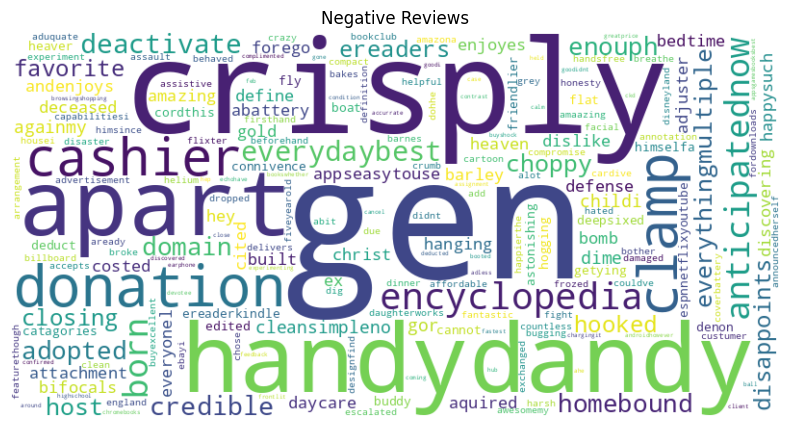

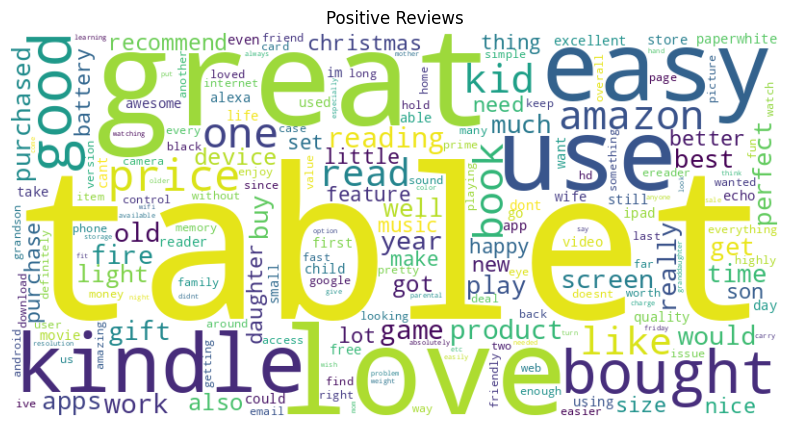

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# # DataFrame setup
# data = pd.DataFrame({
#     'clean_text': ["I love this product", "This is the worst thing ever", "Not bad", "Absolutely fantastic", "Terrible experience"],
#     'sentiment': [0.9, 0.2, 0.6, 0.8, 0.3],
# })

# Create labels for negative and positive reviews
data.loc[data['sentiment'] <= 0.5, 'label'] = 'negative'
data.loc[data['sentiment'] > 0.5, 'label'] = 'positive'

# Filter the original data for negative and positive reviews
negative_reviews_text = data[data['sentiment'].apply(lambda x: 0 <= x <= 0.5)]['clean_text']
positive_reviews_text = data[data['sentiment'].apply(lambda x: x > 0.5)]['clean_text']

# Create a CountVectorizer to count word frequencies
vectorizer = CountVectorizer()

# Fit and transform the 'clean_text' data for negative and positive reviews
X_negative = vectorizer.fit_transform(negative_reviews_text)
X_positive = vectorizer.fit_transform(positive_reviews_text)

# Sum up the counts of each vocabulary word
word_frequencies_negative = X_negative.sum(axis=0).A1
word_frequencies_positive = X_positive.sum(axis=0).A1

# Create a dictionary of word frequencies
vocab = vectorizer.get_feature_names_out()
word_frequencies_negative = dict(zip(vocab, word_frequencies_negative))
word_frequencies_positive = dict(zip(vocab, word_frequencies_positive))

# Create word clouds for negative and positive reviews
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies_negative)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies_positive)

# Display the word clouds in separate figures
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis('off')
plt.show()

print()  # Separating the word clouds display for clarity

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis('off')
plt.show()

# Add a sentiment_label column for the countplot
data['sentiment_label'] = data['label']


In [ ]:
# Previewing our column names
data.columns

Index(['id', 'asins', 'brand', 'product_categories', 'product_keys',
       'manufacturer_name', 'review_do_recommend', 'review_num_helpful',
       'review_rating', 'review_username', 'review_length',
       'review_did_purchase', 'total_votes', 'review_text', 'review_title',
       'clean_text', 'clean_title', 'sentiment', 'label', 'sentiment_label'],
      dtype='object')

* Let's visualize the distribution of sentiment scores and review ratings.

* We will now convert our labels into numerical data for modeling

In [ ]:
# Perform label encoding
label_encoder = LabelEncoder()
data['labeled'] = label_encoder.fit_transform(data['label'])

In [ ]:
print(data[['clean_text', 'sentiment', 'labeled']])

                                                                  clean_text  \
review_date                                                                    
2017-01-13 00:00:00+00:00  product far disappointed child love use like a...   
2017-01-13 00:00:00+00:00  great beginner experienced person bought gift ...   
2017-01-13 00:00:00+00:00  inexpensive tablet use learn step nabi thrille...   
2017-01-13 00:00:00+00:00  ive fire hd two week love tablet great valuewe...   
2017-01-12 00:00:00+00:00  bought grand daughter come visit set user ente...   
...                                                                      ...   
2017-07-29 00:00:00+00:00  great sound quality great way control smart de...   
2017-07-29 00:00:00+00:00       daughter love us every day reminder question   
2017-07-29 00:00:00+00:00  really enjoy great speaker music demand asking...   
2017-07-28 00:00:00+00:00  plugging echo downloading alexa app rest proce...   
2017-07-28 00:00:00+00:00  husband love 

#### Feature Extraction

* In this step, we will extract bigrams from the text data and analyze their frequency.

In [ ]:
#Extraction of Bigrams

# Function to generate n-grams
from collections import defaultdict
from nltk import ngrams # Import the ngrams function

# Function to generate n-grams
def generate_ngrams(clean_text, n):
    words = clean_text.split()
    return list(ngrams(words, n))

# Initialize a defaultdict for frequency counts
freq_dict = defaultdict(int)

# Calculate bigram frequency
for sent in data["clean_text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
# Sort the frequency dictionary and create a DataFrame
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1], reverse=True))
fd_sorted.columns = ["word", "wordcount"]
print(fd_sorted.head(25))

                    word  wordcount
0            (easy, use)       1752
1            (year, old)       1261
2         (kindle, fire)        873
3        (great, tablet)        865
4         (great, price)        674
5          (work, great)        671
6        (battery, life)        640
7           (play, game)        554
8         (amazon, fire)        493
9         (fire, tablet)        483
10           (best, buy)        483
11       (tablet, great)        481
12          (read, book)        479
13      (great, product)        478
14    (would, recommend)        476
15        (love, tablet)        420
16       (tablet, price)        394
17          (work, well)        389
18       (black, friday)        388
19        (good, tablet)        386
20      (bought, tablet)        365
21           (kid, love)        364
22        (love, kindle)        357
23  (kindle, paperwhite)        334
24       (reading, book)        327


* Let's visualize the top 25 most frequent bigrams

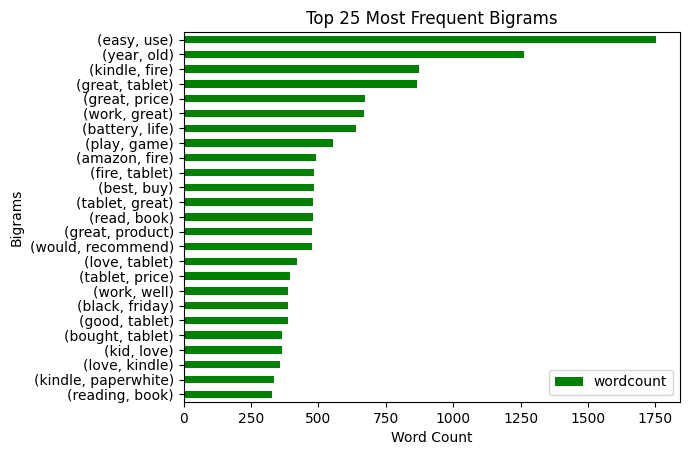

In [ ]:
# Function to plot a horizontal bar chart
def horizontal_bar_chart(data, color):
    data.plot(kind='barh', x='word', y='wordcount', color=color)
    plt.xlabel('Word Count')
    plt.ylabel('Bigrams')
    plt.title('Top 25 Most Frequent Bigrams')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
    plt.show()

# Plot the top 25 most frequent bigrams
horizontal_bar_chart(fd_sorted.head(25), 'green')

In [ ]:
#Extraction of Trigrams


# Calculate trigram frequency
for sent in data["clean_text"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
# Sort the frequency dictionary and create a DataFrame
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1], reverse=True))
fd_sorted.columns = ["word", "wordcount"]
print(fd_sorted.head(25))

                    word  wordcount
0            (easy, use)       1752
1            (year, old)       1261
2         (kindle, fire)        873
3        (great, tablet)        865
4         (great, price)        674
5          (work, great)        671
6        (battery, life)        640
7           (play, game)        554
8         (amazon, fire)        493
9         (fire, tablet)        483
10           (best, buy)        483
11       (tablet, great)        481
12          (read, book)        479
13      (great, product)        478
14    (would, recommend)        476
15        (love, tablet)        420
16       (tablet, price)        394
17          (work, well)        389
18       (black, friday)        388
19        (good, tablet)        386
20      (bought, tablet)        365
21           (kid, love)        364
22        (love, kindle)        357
23  (kindle, paperwhite)        334
24       (reading, book)        327


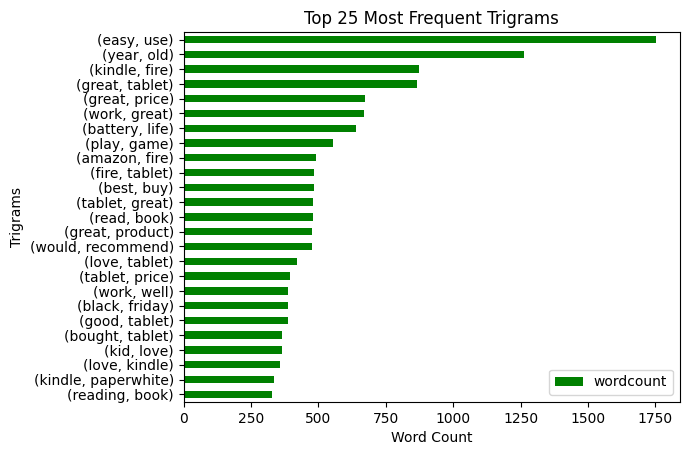

In [ ]:
# Function to plot a horizontal bar chart
def horizontal_bar_chart(data, color):
    data.plot(kind='barh', x='word', y='wordcount', color=color)
    plt.xlabel('Word Count')
    plt.ylabel('Trigrams')
    plt.title('Top 25 Most Frequent Trigrams')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
    plt.show()

# Plot the top 25 most frequent trigrams
horizontal_bar_chart(fd_sorted.head(25), 'green')

#### Word Vectorization

Methods used are:

#### TF-IDF Vectorization

The TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer transforms the text into a weighted matrix, where each term's importance is adjusted based on its frequency in the document and across all documents.

#### Count Vectorization

The Count Vectorizer to converts the text into a matrix of token counts, representing the raw frequency of each term.

#### The result

Two matrices one with TF-IDF weights and another with raw token counts, each representing the reviews in a numerical format.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

clean_text = data['clean_text']

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the clean_text column
X_count = vectorizer.fit_transform(clean_text)

# Print the array representation of the features
print(X_count.toarray()[1:])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# CountVectorizer
count_vec = CountVectorizer()
# Convert the Pandas Series to a list of strings
X_count = count_vec.fit_transform(clean_text.tolist())
print('CountVectorizer:')
print(count_vec.get_feature_names_out()[:10], '\n')


CountVectorizer:
['aa' 'abandon' 'abandoned' 'abattery' 'abc' 'abcmouse' 'abcmousecom'
 'abd' 'ability' 'abilty'] 



* We extracted the first 10 feature names

Next is the TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the corpus and transform the corpus into a TF-IDF matrix
X_tfidf = vectorizer.fit_transform(clean_text)

# Print the TF-IDF matrix as a dense array
print(X_tfidf.toarray(), "\n")

# Print the feature names
print("Feature names:")
print(vectorizer.get_feature_names_out())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

Feature names:
['aa' 'abandon' 'abandoned' ... 'zoomed' 'zooming' 'zwave']


#### Word Embedding Techniques (Word2Vec and FastText):

We used advanced word embedding techniques to capture the semantic meaning of words in the reviews.

**Word2Vec**: This technique uses a neural network model to learn vector representations of words based on their context in the corpus. We trained a Word2Vec model on our tokenized text data to obtain word vectors.

**FastText:** Similar to Word2Vec, but it also considers subword information, making it better at handling rare and out-of-vocabulary words. We trained a FastText model to generate word vectors that include subword information.

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Tokenize the text
sentences = [word_tokenize(doc.lower()) for doc in data['clean_text']]

# Train Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Get word vectors
word_vectors = model.wv

# Get the combined matrix of word vectors
wordvec_matrix = word_vectors.vectors
print(wordvec_matrix)

[[-5.91852427e-01 -1.15684964e-01  7.11060837e-02 ... -4.64988738e-01
   8.14194262e-01  3.35355252e-01]
 [-1.52135766e+00  7.26664364e-01  5.14629662e-01 ... -1.70367733e-01
  -1.11762919e-01 -2.52520949e-01]
 [-8.51729035e-01  8.20121348e-01 -3.19332480e-01 ... -7.64260054e-01
   5.89437708e-02 -1.85080305e-01]
 ...
 [-2.01675110e-02 -1.57647708e-03 -3.30265216e-03 ... -1.41850607e-02
   8.24625138e-03 -5.22816647e-03]
 [-3.46319191e-03 -5.92788681e-04  5.84608503e-03 ... -2.08582189e-02
   5.52937156e-03  3.03241285e-03]
 [-9.75433458e-03  1.20619293e-02 -9.40152165e-03 ... -2.92368070e-03
   9.76519287e-03  4.43352619e-03]]


In [ ]:
from gensim.models import FastText
from nltk.tokenize import word_tokenize

# Tokenize the text
sentences = [word_tokenize(doc.lower()) for doc in data['clean_text']]

# Train FastText model
model = FastText(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Get word vectors
word_vectors = model.wv

# Get the combined matrix of word vectors
fasttext_matrix = word_vectors.vectors
print(fasttext_matrix)


[[-0.9189425   0.48709598 -0.76550424 ... -0.3025607   0.46892732
  -0.0281456 ]
 [-1.5981714  -0.71410924 -0.8901838  ...  0.48710644  1.2479365
   0.5013436 ]
 [-1.2803963  -0.25787374 -0.9223343  ...  0.14660239  0.05923066
   0.40174818]
 ...
 [-0.13212799 -0.3026582  -0.5194815  ... -0.08484916 -0.07165129
   0.49663594]
 [-0.66055095 -0.3015146  -0.48734954 ... -0.29908112  0.19231087
   0.26607442]
 [-0.1676146  -0.13033691 -0.61114514 ... -0.14640707 -0.04662995
   0.4260874 ]]


* Both Word2Vec and FastText are models used to create word embeddings from text data. Word2Vec focuses on capturing word meanings based on their context in sentences, while FastText adds the ability to understand word structure by considering subword information like prefixes and suffixes.

##Train test split

1. Count vectorizer

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target for each matrix
X = X_count
y = data['labeled']

# Split data into train and test sets
X_train_countvec, X_test_countvec, y_train_countvec, y_test_countvec = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print("X_train_countvec shape:", X_train_countvec.shape)
print("y_train_countvec shape:", y_train_countvec.shape)
print("X_test_countvec shape:", X_test_countvec.shape)
print("y_test_countvec shape:", y_test_countvec.shape)


X_train_countvec shape: (18600, 11975)
y_train_countvec shape: (18600,)
X_test_countvec shape: (4651, 11975)
y_test_countvec shape: (4651,)


2. TF-IDF VECTORIZER

In [ ]:
from sklearn.model_selection import train_test_split

X = X_tfidf
y = data['labeled']

# Split data into train and test sets
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print("X_train_tfidf shape:", X_train_tfidf.shape)
print("y_train_tfidf shape:", y_train_tfidf.shape)
print("X_test_tfidf shape:", X_test_tfidf.shape)
print("y_test_tfidf shape:", y_test_tfidf.shape)


X_train_tfidf shape: (18600, 11975)
y_train_tfidf shape: (18600,)
X_test_tfidf shape: (4651, 11975)
y_test_tfidf shape: (4651,)


## MODELLING

BASELINE MODEL

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.callbacks import EarlyStopping

# Define the variables
MAX_NB_WORDS = 1000  # Maximum number of words to consider
EMBEDDING_DIM = 100   # Dimension of the embedding vector
MAX_SEQUENCE_LENGTH = 1000  # Maximum length of the input sequences
epochs = 10
batch_size = 32

#import Libraries
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences # Import pad_sequences
from tensorflow.keras.models import Sequential

# Define the model
model_rnn = Sequential()
model_rnn.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model_rnn.add(SimpleRNN(100, dropout=0.2, recurrent_dropout=0.2))
model_rnn.add(Dense(3, activation='softmax'))

# Compile the model
model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define EarlyStopping callback # Define the EarlyStopping callback here
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Check if X_train_countvec is a sparse matrix and convert if necessary
if hasattr(X_train_countvec, 'toarray'):
    X_train_countvec = X_train_countvec.toarray()

if hasattr(X_test_countvec, 'toarray'):
    X_test_countvec = X_test_countvec.toarray()

# Pad sequences to ensure uniform length
X_train_countvec = pad_sequences(X_train_countvec, maxlen=MAX_SEQUENCE_LENGTH) # Pad training sequences
X_test_countvec = pad_sequences(X_test_countvec, maxlen=MAX_SEQUENCE_LENGTH)   # Pad testing sequences

# Train the model
history = model_rnn.fit(X_train_countvec, y_train_countvec, epochs=epochs, batch_size=batch_size, validation_data=(X_test_countvec, y_test_countvec), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model_rnn.evaluate(X_test_countvec, y_test_countvec, verbose=2)
print(f'Test Accuracy: {accuracy}')


Epoch 1/10
852/852 [==============================] - 539s 626ms/step - loss: 0.5739 - accuracy: 0.7633 - val_loss: 0.5500 - val_accuracy: 0.7711
Epoch 2/10
852/852 [==============================] - 551s 647ms/step - loss: 0.5433 - accuracy: 0.7715 - val_loss: 0.5384 - val_accuracy: 0.7711
Epoch 3/10
852/852 [==============================] - 513s 601ms/step - loss: 0.5416 - accuracy: 0.7715 - val_loss: 0.5389 - val_accuracy: 0.7711
Epoch 4/10
852/852 [==============================] - 505s 593ms/step - loss: 0.5408 - accuracy: 0.7715 - val_loss: 0.5381 - val_accuracy: 0.7711
Epoch 5/10
852/852 [==============================] - 510s 599ms/step - loss: 0.5401 - accuracy: 0.7715 - val_loss: 0.5426 - val_accuracy: 0.7711
Epoch 6/10
852/852 [==============================] - 532s 625ms/step - loss: 0.5408 - accuracy: 0.7715 - val_loss: 0.5439 - val_accuracy: 0.7711
Epoch 7/10
852/852 [==============================] - 536s 629ms/step - loss: 0.5392 - accuracy: 0.7715 - val_loss: 0.5481 -

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Reshape
from keras.callbacks import EarlyStopping

# Define the variables
MAX_NB_WORDS = 1000  # Maximum number of words to consider
EMBEDDING_DIM = 100   # Dimension of the embedding vector
MAX_SEQUENCE_LENGTH = 1000  # Maximum length of the input sequences
epochs = 10
batch_size = 32

#import Libraries
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences # Import pad_sequences
from tensorflow.keras.models import Sequential

# Define the RNN model
model_rnn = Sequential()
model_rnn.add(Dense(128, input_dim=MAX_SEQUENCE_LENGTH, activation='relu'))
model_rnn.add(Dense(64, activation='relu'))

# Reshape the output of the Dense layer to be 3D for the SimpleRNN layer
model_rnn.add(Reshape((1, 64)))  # Assuming 64 features per timestep
model_rnn.add(SimpleRNN(100, dropout=0.2, recurrent_dropout=0.2))
model_rnn.add(Dense(2, activation='softmax'))  # Assuming you have 3 classes for classification

# Compile the model
model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define EarlyStopping callback # Define the EarlyStopping callback here
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Check if X_train_countvec is a sparse matrix and convert if necessary
if hasattr(X_train_tfidf, 'toarray'):
    X_train_tfidf = X_train_tfidf.toarray()

if hasattr(X_test_tfidf, 'toarray'):
    X_test_tfidf = X_test_tfidf.toarray()

# Pad sequences to ensure uniform length
X_train_tfidf = pad_sequences(X_train_tfidf, maxlen=MAX_SEQUENCE_LENGTH) # Pad training sequences
X_test_tfidf = pad_sequences(X_test_tfidf, maxlen=MAX_SEQUENCE_LENGTH)   # Pad testing sequences

# Train the model
history = model_rnn.fit(X_train_tfidf, y_train_tfidf, epochs=epochs, batch_size=batch_size, validation_data=(X_test_tfidf, y_test_tfidf), callbacks=[early_stopping]) # Use X_test_tfidf and y_test_tfidf for validation data
# Evaluate the model
loss, accuracy = model_rnn.evaluate(X_test_tfidf, y_test_tfidf, verbose=2)
print(f'Test Accuracy: {accuracy}')


Epoch 1/10
582/582 [==============================] - 8s 6ms/step - loss: 0.5403 - accuracy: 0.7731 - val_loss: 0.5318 - val_accuracy: 0.7762
Epoch 2/10
582/582 [==============================] - 3s 6ms/step - loss: 0.5349 - accuracy: 0.7741 - val_loss: 0.5324 - val_accuracy: 0.7762
Epoch 3/10
582/582 [==============================] - 3s 6ms/step - loss: 0.5348 - accuracy: 0.7741 - val_loss: 0.5319 - val_accuracy: 0.7762
Epoch 4/10
582/582 [==============================] - 5s 9ms/step - loss: 0.5350 - accuracy: 0.7741 - val_loss: 0.5318 - val_accuracy: 0.7762
Epoch 5/10
582/582 [==============================] - 3s 6ms/step - loss: 0.5349 - accuracy: 0.7741 - val_loss: 0.5319 - val_accuracy: 0.7762
Epoch 6/10
582/582 [==============================] - 3s 6ms/step - loss: 0.5346 - accuracy: 0.7741 - val_loss: 0.5318 - val_accuracy: 0.7762
Epoch 7/10
582/582 [==============================] - 4s 7ms/step - loss: 0.5349 - accuracy: 0.7741 - val_loss: 0.5330 - val_accuracy: 0.7762
146/14

In [ ]:
# from sklearn.model_selection import train_test_split
# from keras.models import Sequential
# from keras.layers import SimpleRNN, Dense, Embedding
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# import numpy as np

# # Assuming X_count is a sparse matrix produced by CountVectorizer
# # Convert sparse matrix to dense
# # X_count= X_count.toarray()

# # Split data into train and test sets
# Xtrain_countvec, Xtest_countvec, ytrain_countvec, ytest_countvec = train_test_split(X_count, data['labeled'], test_size=0.2, random_state=42)

# # Define the maximum length for padding
# max_len = X_count.shape[1]

# # Define Simple RNN model
# model = Sequential()
# model.add(Embedding(input_dim=max_len, output_dim=100, input_length=max_len))
# model.add(SimpleRNN(units=100))
# model.add(Dense(1, activation='sigmoid'))

# # Compile model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Print model summary
# model.summary()

# # Fit the model
# history = model.fit(Xtrain_countvec, ytrain_countvec, epochs=10, batch_size=32, validation_split=0.1)

# # Evaluate on test data
# loss, accuracy = model.evaluate(Xtest_countvec, ytest_countvec)
# print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


In [ ]:
# from keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# history = model.fit(Xtrain_countvec, ytrain_countvec, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stopping])
